### Simple jury-rigged example of particle-conserving circuit.
4 hardcore bosonic modes.
2 particles.

In [62]:
import quimb
import quimb.tensor as qtn
import numpy as np
import itertools

# Output all lone lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [49]:

# Return rank-4 U(1)-preserving tensor
def getATens(theta,phi=0):
    
    A_data = np.zeros((4,4))
    A_data[0,0] = A_data[3,3] = 1
    A_data[1,1] = A_data[2,2] = np.cos(theta)
    A_data[1,2] = -np.sin(theta)
    A_data[2,1] = np.sin(theta)
    return(A_data.reshape((2,2,2,2)))

print( getATens(.2) )


[[[[ 1.          0.        ]
   [ 0.          0.        ]]

  [[ 0.          0.98006658]
   [-0.19866933  0.        ]]]


 [[[ 0.          0.19866933]
   [ 0.98006658  0.        ]]

  [[ 0.          0.        ]
   [ 0.          1.        ]]]]


In [36]:
# The four "top" nodes
i0 = qtn.Tensor([1,0],inds=('a'))  # |0>
i1 = qtn.Tensor([0,1],inds=('b'))  # |1>
i2 = qtn.Tensor([0,1],inds=('c'))  # |1>
i3 = qtn.Tensor([1,0],inds=('d'))  # |0>

# Three rank-4 tensors
Aa = qtn.Tensor(data=getATens(.2), inds=('a','b','e','f'))
Ab = qtn.Tensor(data=getATens(.2), inds=('c','d','g','h'))
Ac = qtn.Tensor(data=getATens(.2), inds=('f','g','i','j'))

# Stitch together tensors
TN = i0 & i1 & i2 & i3 & Aa & Ab & Ac
print(TN)

# Ensure it contracts to rank-4 tensor
print(TN^...)


TensorNetwork([
    Tensor(shape=(2,), inds=('a',), tags=oset([])),
    Tensor(shape=(2,), inds=('b',), tags=oset([])),
    Tensor(shape=(2,), inds=('c',), tags=oset([])),
    Tensor(shape=(2,), inds=('d',), tags=oset([])),
    Tensor(shape=(2, 2, 2, 2), inds=('a', 'b', 'e', 'f'), tags=oset([])),
    Tensor(shape=(2, 2, 2, 2), inds=('c', 'd', 'g', 'h'), tags=oset([])),
    Tensor(shape=(2, 2, 2, 2), inds=('f', 'g', 'i', 'j'), tags=oset([])),
])
Tensor(shape=(2, 2, 2, 2), inds=('e', 'h', 'i', 'j'), tags=oset([]), backend='numpy', dtype='float64')


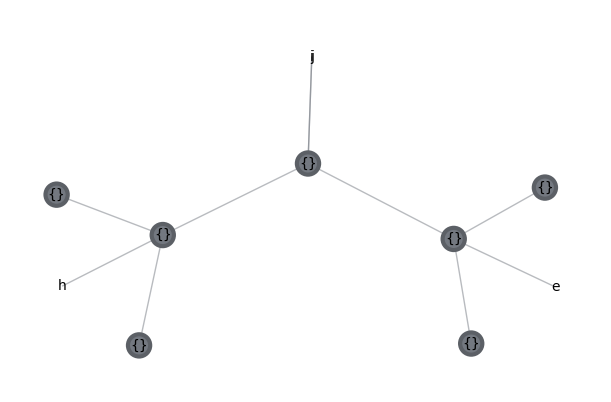

'i' and 'j' are on top of each other in the drawing


In [45]:
# Draw
TN.draw(iterations=15)
print("'i' and 'j' are on top of each other in the drawing")

In [50]:
# Fully contract the TN
final = (TN^...)
print(final.data)

# Test that only N=2 states are nonzero
for I,J,K,L in itertools.product([0,1],repeat=4):
    print(I,J,K,L)
    print(f"Should be {'nonzero' if sum([I,J,K,L])==2 else 'zero'}:")
    print(final.data[I,J,K,L])
    print()
    


[[[[ 0.          0.        ]
   [ 0.          0.9605305 ]]

  [[ 0.          0.03868274]
   [ 0.19082795  0.        ]]]


 [[[ 0.         -0.19082795]
   [ 0.03868274  0.        ]]

  [[-0.0394695   0.        ]
   [ 0.          0.        ]]]]
0 0 0 0
Should be zero:
0.0

0 0 0 1
Should be zero:
0.0

0 0 1 0
Should be zero:
0.0

0 0 1 1
Should be nonzero:
0.9605304970014426

0 1 0 0
Should be zero:
0.0

0 1 0 1
Should be nonzero:
0.03868274073289083

0 1 1 0
Should be nonzero:
0.19082795104752415

0 1 1 1
Should be zero:
0.0

1 0 0 0
Should be zero:
0.0

1 0 0 1
Should be nonzero:
-0.19082795104752412

1 0 1 0
Should be nonzero:
0.03868274073289083

1 0 1 1
Should be zero:
0.0

1 1 0 0
Should be nonzero:
-0.039469502998557456

1 1 0 1
Should be zero:
0.0

1 1 1 0
Should be zero:
0.0

1 1 1 1
Should be zero:
0.0



In [66]:
# B = np.array([[1,2],[3,-4.]])
B = np.array([[1,1],[1,-1.]])
u,d,w = np.linalg.svd(B)
display(u,d,w)
d = np.diag(d)

# Absorb left:
u.dot(d)
w

# Absorb right:
u
d.dot(w)

# Absorb both:
u.dot(np.sqrt(d))
np.sqrt(d).dot(w)


array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

array([1.41421356, 1.41421356])

array([[-1., -0.],
       [-0., -1.]])

array([[-1., -1.],
       [-1.,  1.]])

array([[-1., -0.],
       [-0., -1.]])

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

array([[-1.41421356,  0.        ],
       [ 0.        , -1.41421356]])

array([[-0.84089642, -0.84089642],
       [-0.84089642,  0.84089642]])

array([[-1.18920712,  0.        ],
       [ 0.        , -1.18920712]])